# 01 - Tutorial

In this notebook you can find example code to retrieve stock information and visualize it.

In [1]:
import sys
sys.path.insert(0, '../')
%reload_ext autoreload
%autoreload 2
%pip install seaborn

You should consider upgrading via the '/home/saheru/Documents/Programming/Finance/IBKR/ibeam/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Start server

The `Server` class is the interface to perform HTTPS requests to acquire data regarding instruments, like stocks.

In [2]:
import time

import seaborn as sns
from matplotlib import pyplot as plt

from modules.server import Server

In [3]:
srv = Server()
srv.start()

Once started, we can request information on any stock we want simply by accesing items in `srv`. These will be cached, so only the first access will have significant delay.

In [4]:
# request stock and time performance
start_t = time.perf_counter()
stock = srv['SPY']
stop_t = time.perf_counter()

print(f'Retrieved: {stock}')
print(f'Requesting stock took {stop_t - start_t:.4f}s')

[2021-08-24 17:37:08,039] I T139800802158144 server.py:223: Started StockCache thread for bar "1h". 
		Next data update will be in  1371.96s.
Retrieved: Stock("SPY", conid=756733)
Requesting stock took 0.2392s


In [5]:
%%timeit
srv['SPY']

206 ms ± 8.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can print and visualize the historical of the stock,

In [6]:
stock.hist

,open,close,high,low,volume
date,,,,,
2021-07-26 13:30:00,439.34,439.98,440.24,439.27,44122
2021-07-26 14:00:00,439.97,439.65,440.07,439.26,50248
2021-07-26 15:00:00,439.65,440.71,440.75,439.40,37619
2021-07-26 16:00:00,440.71,440.19,440.83,439.94,28280
2021-07-26 17:00:00,440.18,440.33,440.70,440.18,21188
...,...,...,...,...,...
2021-08-23 18:00:00,447.72,448.04,448.11,447.64,34909
2021-08-23 19:00:00,448.03,447.25,448.07,447.13,103191
2021-08-24 13:30:00,447.97,448.01,448.18,447.42,46941


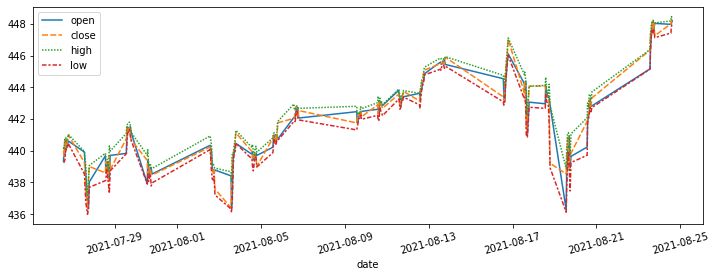

In [7]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stock.hist[y])
plt.xticks(rotation=15)
plt.show()

## Different time intervals

We can specify the period and bar (time step) to get different time intervals and resolutions on the stock's value.

In [8]:
period = '5y'
bar = '1d'
stock = srv['SPY', period, bar]
print('Number of data points: ', len(stock.hist))

[2021-08-24 17:37:10,454] I T139800514393664 server.py:223: Started StockCache thread for bar "1d". 
		Next data update will be in  30169.55s.
Number of data points:  999


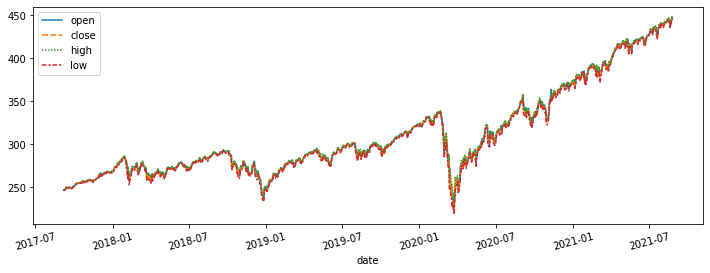

In [9]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stock.hist[y])
plt.xticks(rotation=15)
plt.show()

## Multiple stocks

You can acquire at once information about multiple stocks. Note that the time interval will be the same for all of them.

`Server` caches stocks following a [Least Recently Used (LRU)](https://en.wikipedia.org/wiki/Cache_replacement_policies#Least_recently_used_(LRU)) policy.

In [10]:
start_t = time.perf_counter()
for stk in srv[['SPY', 'AAPL', 'MSFT', 'TSLA']]:
    print(stk)
stop_t = time.perf_counter()
print(f'Elapsed time: {stop_t - start_t:.4f}s')

[2021-08-24 17:37:11,504] W T139800497608256 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:11,524] W T139800506000960 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:11,564] W T139800489215552 connectionpool.py:304: Connection pool is full, discarding connection: localhost
Stock("SPY", conid=756733)
Stock("AAPL", conid=265598)
Stock("MSFT", conid=272093)
Stock("TSLA", conid=76792991)
Elapsed time: 0.4108s


again, since the data is cached, only the first time they are accessed there will be a significant delay.

In [11]:
%%timeit
srv[['SPY', 'AAPL', 'MSFT', 'TSLA']]

[2021-08-24 17:37:11,940] W T139800497608256 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:11,941] W T139800506000960 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:11,969] W T139800665380416 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:12,194] W T139800489215552 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:12,214] W T139800497608256 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:12,235] W T139800506000960 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:12,469] W T139800497608256 connectionpool.py:304: Connection pool is full, discarding connection: localhost
[2021-08-24 17:37:12,484] W T139800665380416 connectionpool.py:304: Connection pool is full, discarding connection: lo

we can also specify the period and bar for the multiple stocks,

In [12]:
period = '1y'
bar = '1d'
spy, aapl = srv[['SPY', 'AAPL'], period, bar]

print('SPY start and end dates:  ', spy.hist.index[0], ' -> ', spy.hist.index[-1])
print('AAPL start and end dates: ', aapl.hist.index[0], ' -> ', aapl.hist.index[-1])

SPY start and end dates:   2017-09-06 13:30:00  ->  2021-08-24 13:30:00
AAPL start and end dates:  2020-08-26 13:30:00  ->  2021-08-24 13:30:00
